# Modélisation
- Preprocessing
- Baseline : Regression Logistique sur application_train.csv
- Modele 1 : Regression Logistique sur data.csv
- Modele 2 : RandomForest sur data.csv
- Modele 3 : XGBoost sur data.csv

In [112]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import gc

## Fichiers 
Pour des soucis de performances je vais travailler sur un echantllion de 25% des individus.

In [113]:
app = pd.read_csv('Data/app.csv')
app = app.sample(frac=0.25)
data = pd.read_csv('Data/data.csv')
data = data.sample(frac=0.25)

In [114]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
9601,111158,0,0,1,1,0,202500.0,767313.0,44991.0,711000.0,...,0,0,0,0,0,0,0,0,0,False
152671,276947,0,0,0,1,1,135000.0,1155226.5,33907.5,904500.0,...,0,0,0,0,0,0,0,0,0,False
243319,381675,0,0,0,1,0,126000.0,545040.0,25537.5,450000.0,...,0,0,0,0,1,0,0,1,0,False
287438,432953,0,0,0,1,0,171000.0,127350.0,12726.0,112500.0,...,0,0,0,0,0,0,0,0,0,True
63735,173905,0,0,0,1,1,360000.0,900000.0,36787.5,900000.0,...,0,0,0,0,0,0,0,0,0,False


In [115]:
app.shape

(76878, 244)

In [116]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,...,client_installments_NUM_INSTALMENT_VERSION_sum_mean,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_mean_min,client_installments_AMT_INSTALMENT_max_min,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_INSTALMENT_max_max,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum
95534,210918,0,0,0,1,0,270000.0,378117.0,40122.0,0.006008,...,4.200000,7545.870,23525.550,11011.3310,21407.715,13514.1750,23525.550,23525.550,53709.03000,53709.03
266349,408563,0,0,0,1,0,171000.0,993082.5,42205.5,0.025164,...,14.421053,4.185,14310.000,2777.9468,5864.310,15718.0600,36113.310,397962.530,297301.78000,893345.00
224080,359538,0,0,0,1,0,112500.0,900000.0,43429.5,0.015221,...,28.000000,6.075,6.075,3556.2393,4153.725,3556.2393,99574.695,4153.725,170.09999,113092.56
246228,384967,0,1,1,0,0,135000.0,270000.0,13500.0,0.018634,...,16.903225,3715.200,6347.115,4668.9700,6372.045,5327.4210,76439.610,21836.836,146754.19000,146754.19
224674,360224,0,0,1,1,0,157500.0,473760.0,50400.0,0.046220,...,34.526318,14701.635,22146.210,17307.2580,16660.936,20181.4280,175760.020,42882.750,331443.10000,225092.25


In [117]:
data.shape

(76878, 718)

## Preprocessing
### Séparation features / target

In [118]:
#app
app_y = app['TARGET']
app_X = app.drop(columns=['TARGET'])
#app_ids = app_X['SK_ID_CURR']
#app_X = app_X.drop(columns=['SK_ID_CURR'])
app_X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
9601,111158,0,1,1,0,202500.0,767313.0,44991.0,711000.0,0.030755,...,0,0,0,0,0,0,0,0,0,False
152671,276947,0,0,1,1,135000.0,1155226.5,33907.5,904500.0,0.030755,...,0,0,0,0,0,0,0,0,0,False
243319,381675,0,0,1,0,126000.0,545040.0,25537.5,450000.0,0.031329,...,0,0,0,0,1,0,0,1,0,False
287438,432953,0,0,1,0,171000.0,127350.0,12726.0,112500.0,0.019101,...,0,0,0,0,0,0,0,0,0,True
63735,173905,0,0,1,1,360000.0,900000.0,36787.5,900000.0,0.018209,...,0,0,0,0,0,0,0,0,0,False


In [119]:
len(app_X.select_dtypes('number').columns)

242

In [120]:
app_X['DAYS_EMPLOYED_ANOM']=app_X['DAYS_EMPLOYED_ANOM'].apply(lambda x: 1 if x else 0)

In [121]:
len(app_X.select_dtypes('number').columns)

243

In [122]:
#data
data_y = data['TARGET']
data_X = data.drop(columns=['TARGET'])
#data_ids = data_X['SK_ID_CURR']
#data_X = data_X.drop(columns=['SK_ID_CURR'])
data_X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,client_installments_NUM_INSTALMENT_VERSION_sum_mean,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_mean_min,client_installments_AMT_INSTALMENT_max_min,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_INSTALMENT_max_max,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum
95534,210918,0,0,1,0,270000.0,378117.0,40122.0,0.006008,15888,...,4.200000,7545.870,23525.550,11011.3310,21407.715,13514.1750,23525.550,23525.550,53709.03000,53709.03
266349,408563,0,0,1,0,171000.0,993082.5,42205.5,0.025164,16694,...,14.421053,4.185,14310.000,2777.9468,5864.310,15718.0600,36113.310,397962.530,297301.78000,893345.00
224080,359538,0,0,1,0,112500.0,900000.0,43429.5,0.015221,21358,...,28.000000,6.075,6.075,3556.2393,4153.725,3556.2393,99574.695,4153.725,170.09999,113092.56
246228,384967,1,1,0,0,135000.0,270000.0,13500.0,0.018634,19118,...,16.903225,3715.200,6347.115,4668.9700,6372.045,5327.4210,76439.610,21836.836,146754.19000,146754.19
224674,360224,0,1,1,0,157500.0,473760.0,50400.0,0.046220,8497,...,34.526318,14701.635,22146.210,17307.2580,16660.936,20181.4280,175760.020,42882.750,331443.10000,225092.25


In [123]:
# Remove variables to free memory
gc.enable()
del app, data
gc.collect()

760

### Train & Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
#app
app_X_train, app_X_test, app_y_train, app_y_test = train_test_split(app_X,app_y,stratify=app_y, test_size=0.2, random_state=5)
print('Nombre d\'individus dans le Train Set :',len(app_X_train),
      '\nNombre d\'individus dans le Test Set :',len(app_X_test),
      '\nNombre de features :',len(app_X_test.columns),'/',len(app_X_train.columns))

Nombre d'individus dans le Train Set : 61502 
Nombre d'individus dans le Test Set : 15376 
Nombre de features : 243 / 243


In [126]:
app_train_ids = app_X_train['SK_ID_CURR']
app_test_ids = app_X_test['SK_ID_CURR']

app_X_train = app_X_train.drop(columns=['SK_ID_CURR'])
app_X_test = app_X_test.drop(columns=['SK_ID_CURR'])

In [127]:
app_feats_names = app_X_train.columns

In [128]:
#data
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X,data_y,stratify=data_y, test_size=0.2, random_state=5)
print('Nombre d\'individus dans le Train Set :',len(data_X_train),
      '\nNombre d\'individus dans le Test Set :',len(data_X_test),
      '\nNombre de features :',len(data_X_test.columns),'/',len(data_X_train.columns))

Nombre d'individus dans le Train Set : 61502 
Nombre d'individus dans le Test Set : 15376 
Nombre de features : 717 / 717


In [129]:
data_train_ids = data_X_train['SK_ID_CURR']
data_test_ids = data_X_test['SK_ID_CURR']

data_X_train = data_X_train.drop(columns=['SK_ID_CURR'])
data_X_test = data_X_test.drop(columns=['SK_ID_CURR'])

In [130]:
data_feats_names = data_X_train.columns

In [131]:
imputer = SimpleImputer(strategy='mean')
data_X_train = imputer.fit_transform(data_X_train)
data_X_train = pd.DataFrame(data_X_train,columns=data_feats_names )
data_X_test = imputer.fit_transform(data_X_test)
data_X_test = pd.DataFrame(data_X_test,columns=data_feats_names )

In [132]:
from sklearn.feature_selection import SelectKBest

In [133]:
selector = SelectKBest(k=200).fit(data_X_train, data_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 13  70 221 231 316 317 318 585 587 589 636 637] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [134]:
mask=selector.get_support()
new_features = data_X_train.columns[mask]
len(new_features)

200

In [135]:
data_x_train_kbest=data_X_train[new_features]
data_x_train_kbest.shape

(61502, 200)

In [136]:
data_x_test_kbest = data_X_test[new_features]
data_x_test_kbest.shape

(15376, 200)

## Modelisation

In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [138]:
df_score = pd.DataFrame(columns=['nom_modele','commentaires','roc-auc_cv','roc-auc_cv_test','roc-auc_test','param_time',
                                 'fit_time','time_total'])

### 0 - Baseline

In [139]:
pipeline_sgd = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', SGDClassifier(random_state=5, loss='log')]])

In [140]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

#### 0.1 - Recherche des paramètres optimaux - Cross-Validation

In [141]:
param_grid = {'model__alpha':[0.0001, 0.001, 0.01, 0.1],
                'model__penalty': ["l2", "l1", "none"]}

In [142]:
grid_search = GridSearchCV(estimator=pipeline_sgd,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [143]:
param_start = time.time()
grid_search.fit(app_X_train, app_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 1.7063366134961446 minutes


In [144]:
cv_score = grid_search.best_score_
test_score = grid_search.score(app_X_test, app_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.7417441108489823 
Test score:  0.7506237211290454 
Best Params :  {'model__alpha': 0.001, 'model__penalty': 'l1'}


#### 0.2 - Modèle Baseline optimisé

In [145]:
baseline = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', SGDClassifier(random_state=5, loss='log', alpha=0.01, penalty='l1')]])

In [146]:
fit_start = time.time()
baseline.fit(app_X_train, app_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [147]:
score=roc_auc_score(app_y_test, baseline.predict(app_X_test))
score

0.6789978432942714

In [148]:
row={'nom_modele': 'Baseline',
     'commentaires':'SGD(app)',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802


### 1 - SGDClassifier (Regression Logistique)
#### 1.A - Data.csv

##### 1.A.2 - Recherche des paramètres optimaux - Cross-Validation

In [149]:
pipeline_sgd = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', SGDClassifier(random_state=5, loss='log')]])

In [150]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

In [151]:
param_grid = {'model__alpha':[0.0001, 0.001, 0.01, 0.1],
                'model__penalty': ["l2", "l1", "none"]}

In [152]:
grid_search = GridSearchCV(estimator=pipeline_sgd,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [153]:
param_start = time.time()
grid_search.fit(data_x_train_kbest, data_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 0.8333839257558187 minutes


In [154]:
cv_score = grid_search.best_score_
test_score = grid_search.score(data_x_test_kbest, data_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.75357043660849 
Test score:  0.7517137482177154 
Best Params :  {'model__alpha': 0.01, 'model__penalty': 'l2'}


##### 1.A.3 - Modèle Optimisé

In [155]:
sgd = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', SGDClassifier(random_state=5, loss='log', alpha=0.1, penalty='l2')]])

In [156]:
fit_start = time.time()
sgd.fit(data_x_train_kbest, data_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [157]:
score=roc_auc_score(data_y_test, sgd.predict(data_x_test_kbest))
score

0.685700004947667

In [158]:
row={'nom_modele': 'SGD',
     'commentaires':'SGD(data), select kbest 200',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468


### 2 - Random Forest
#### 2.A - App.csv sans selection de features
##### 2.A.1 - Optimisation des paramètres - Cross-Validation

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
pipeline_rfc = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', RandomForestClassifier(warm_start=True,random_state=5)]])

In [161]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

In [162]:
param_grid = {'model__max_depth':[1,2,3],
                'model__min_impurity_decrease': [0.0,0.01,0.1],
             'model__n_estimators' : [100,200,300]}

In [163]:
grid_search = GridSearchCV(estimator=pipeline_rfc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [164]:
param_start = time.time()
grid_search.fit(app_X_train, app_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 4.431939101219177 minutes


In [165]:
cv_score = grid_search.best_score_
test_score = grid_search.score(app_X_test, app_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.6614698680380297 
Test score:  0.6635813912340921 
Best Params :  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__n_estimators': 100}


##### 2.A.2 - Modèle Optimisé

In [166]:
rfc = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', RandomForestClassifier(warm_start=True,random_state=5,max_depth=3)]])

In [167]:
fit_start = time.time()
rfc.fit(app_X_train, app_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [168]:
score=roc_auc_score(app_y_test, rfc.predict(app_X_test))
score

0.5792632157275468

In [169]:
row={'nom_modele': 'RFC',
     'commentaires':'RFC(app)',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468
2,RFC,RFC(app),0.661470,0.663581,0.579263,4.431939,0.191172,4.623111


#### 2.B - Data.csv avec selection de features

##### 2.B.1 - Recherche des paramètres optimaux - Cross-Validation

In [170]:
pipeline_rfc = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', RandomForestClassifier(warm_start=True,random_state=5)]])

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

param_grid = {'model__max_depth':[1,2,3],
                'model__min_impurity_decrease': [0.0,0.01,0.1],
             'model__n_estimators' : [100,200,300]}

grid_search = GridSearchCV(estimator=pipeline_rfc,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [171]:
param_start = time.time()
grid_search.fit(data_x_train_kbest, data_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 5.733076322078705 minutes


In [172]:
cv_score = grid_search.best_score_
test_score = grid_search.score(data_x_test_kbest, data_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.6607482892501394 
Test score:  0.6498375703355866 
Best Params :  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__n_estimators': 200}


##### 2.B.2 - Modèle Optimisé

In [173]:
rfc = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', RandomForestClassifier(warm_start=True,random_state=5, max_depth=3,n_estimators=300)]])

In [174]:
fit_start = time.time()
rfc.fit(data_x_train_kbest, data_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [175]:
score=roc_auc_score(data_y_test, rfc.predict(data_x_test_kbest))
score

0.5903255115213177

In [176]:
row={'nom_modele': 'RFC',
     'commentaires':'RFC(data), select kbest 200',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468
2,RFC,RFC(app),0.661470,0.663581,0.579263,4.431939,0.191172,4.623111
3,RFC,"RFC(data), select kbest 200",0.660748,0.649838,0.590326,5.733076,0.743502,6.476578


### 3 - Histogram Gradient Boosting
#### 3.A - App.csv sans selection de features
##### 3.A.1 - Optimisation des paramètres - Cross-Validation

In [177]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [178]:
pipeline_hgb = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', HistGradientBoostingClassifier(loss='binary_crossentropy',warm_start=True,
                                                                                  random_state=5,max_iter=200)]])

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

param_grid = {'model__max_depth':[None,1,2,3],
                'model__learning_rate' : [0.1,0.25,0.5],
             'model__max_iter' : [100,200,300]}

grid_search = GridSearchCV(estimator=pipeline_hgb,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [179]:
param_start = time.time()
grid_search.fit(app_X_train, app_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 6.3435847083727515 minutes


In [180]:
cv_score = grid_search.best_score_
test_score = grid_search.score(app_X_test, app_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.7431410856837061 
Test score:  0.7530592840698952 
Best Params :  {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__max_iter': 300}


##### 3.A.2 Modèle Optimisé

In [181]:
hgb = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', HistGradientBoostingClassifier(loss='binary_crossentropy',warm_start=True,
                                                                                  random_state=5)]])

In [182]:
fit_start = time.time()
hgb.fit(app_X_train, app_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [183]:
score=roc_auc_score(app_y_test, hgb.predict(app_X_test))
score

0.509783794044194

In [184]:
row={'nom_modele': 'HGB',
     'commentaires':'HGB(app)',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468
2,RFC,RFC(app),0.661470,0.663581,0.579263,4.431939,0.191172,4.623111
3,RFC,"RFC(data), select kbest 200",0.660748,0.649838,0.590326,5.733076,0.743502,6.476578
4,HGB,HGB(app),0.743141,0.753059,0.509784,6.343585,0.223399,6.566984


#### 3.B - Data Features KBest 
##### 3.B.1 - Optimisation des paramètres - Cross-Validation

In [185]:
pipeline_hgb = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', HistGradientBoostingClassifier(loss='binary_crossentropy',warm_start=True,
                                                                                  random_state=5,max_iter=200)]])

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

param_grid = {'model__max_depth':[None,1,2,3],
                'model__learning_rate' : [0.1,0.25,0.5],
             'model__max_iter' : [100,200,300]}

grid_search = GridSearchCV(estimator=pipeline_hgb,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

In [186]:
param_start = time.time()
grid_search.fit(data_x_train_kbest, data_y_train)
param_end = time.time()
param_time = (param_end - param_start)/60
print('temps de CV :',param_time,'minutes')

temps de CV : 5.430502021312714 minutes


In [187]:
cv_score = grid_search.best_score_
test_score = grid_search.score(data_x_test_kbest, data_y_test)
print('Cross-validation score: ',cv_score,'\nTest score: ',test_score,'\nBest Params : ',grid_search.best_params_)

Cross-validation score:  0.7553315756891713 
Test score:  0.7389368475263913 
Best Params :  {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__max_iter': 300}


##### 3.B.2 - Modèle Optimisé

In [188]:
hgb = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', HistGradientBoostingClassifier(loss='binary_crossentropy',warm_start=True,
                                                                                  random_state=5, max_depth=3, max_iter=300)]])

In [189]:
fit_start = time.time()
hgb.fit(data_x_train_kbest, data_y_train)
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [190]:
score=roc_auc_score(data_y_test, hgb.predict(data_x_test_kbest))
score

0.5221879258929415

In [191]:
row={'nom_modele': 'HGB',
     'commentaires':'HGB(data) select kbest 200',
     'roc-auc_cv':cv_score,
     'roc-auc_cv_test':test_score,
     'roc-auc_test':score,
     'param_time':param_time,
     'fit_time':fit_time,
     'time_total':param_time+fit_time}
df_score=df_score.append(row, ignore_index=True)
df_score

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468
2,RFC,RFC(app),0.661470,0.663581,0.579263,4.431939,0.191172,4.623111
3,RFC,"RFC(data), select kbest 200",0.660748,0.649838,0.590326,5.733076,0.743502,6.476578
4,HGB,HGB(app),0.743141,0.753059,0.509784,6.343585,0.223399,6.566984
5,HGB,HGB(data) select kbest 200,0.755332,0.738937,0.522188,5.430502,0.216746,5.647248


### Test LGBM

In [91]:
import lightgbm as lgb

In [92]:
# Create the model
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                           class_weight = 'balanced', learning_rate = 0.05, 
                           reg_alpha = 0.1, reg_lambda = 0.1, 
                           subsample = 0.8, n_jobs = 5, random_state = 5)

In [93]:
import re
data_x_train_kbest_lgbm = data_x_train_kbest.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [94]:
fit_start = time.time()
model.fit(data_x_train_kbest_lgbm, data_y_train_smote, eval_metric = 'auc')
fit_end = time.time()
fit_time = (fit_end - fit_start)/60

In [95]:
print(fit_time)

9.16705861488978


In [96]:
roc_auc_score(data_y_test, model.predict(data_x_test_kbest))

0.5208760472024576

### Sélection du meilleur modèle

In [192]:
df_score.sort_values(by=['roc-auc_cv_test'], ascending=False)

,nom_modele,commentaires,roc-auc_cv,roc-auc_cv_test,roc-auc_test,param_time,fit_time,time_total
4,HGB,HGB(app),0.743141,0.753059,0.509784,6.343585,0.223399,6.566984
1,SGD,"SGD(data), select kbest 200",0.753570,0.751714,0.685700,0.833384,0.039084,0.872468
0,Baseline,SGD(app),0.741744,0.750624,0.678998,1.706337,0.505465,2.211802
5,HGB,HGB(data) select kbest 200,0.755332,0.738937,0.522188,5.430502,0.216746,5.647248
2,RFC,RFC(app),0.661470,0.663581,0.579263,4.431939,0.191172,4.623111
3,RFC,"RFC(data), select kbest 200",0.660748,0.649838,0.590326,5.733076,0.743502,6.476578


Le meilleur modèle semble donc être le SGDClassifier sur data.csv avec une sélection de 416 features. En effet c'est le modèle qui présente le meilleur score ROC-AUC en cross-validation et sur le test set. De plus, elle ne présente pas d'overfitting contrairement aux méthodes ensemblistes.

In [111]:
model = Pipeline(steps = [['imputer', SimpleImputer(strategy='median')],
                                         ['smote', SMOTE(random_state=5)],
                                         ['scaler', StandardScaler()],
                                         ['model', SGDClassifier(random_state=5, loss='log', alpha=0.1, penalty='l2')]])
model.fit(data_x_train_kbest, data_y_train)
roc_auc_score(data_y_test, model.predict(data_x_test_kbest))

0.6885195171657176

### Recherche du seuil de probabilité optimal
Jusqu'à maintenant on en considéré avec nos modèle un seuil de probabilité de 0.5 c'est à dire que :
- si P = [0,0.5[ : 0
- si P = [0.5,1] : 1

Seulement dans notre problématique il faut qu'on trouve une balance optimale entre les FP et les FN car ils n'ont pas le même coût pour l'entreprise. Un FN coûte 10 fois plus qu'un FP à l'entreprise, il faut donc trouver le seuil de probabilité qui minimise la fonction suivante : FP + 10FN

In [104]:
#on récupère les probabilité d'appartenance à chaque classes
proba_pred = model.predict_proba(data_x_test_kbest)

In [105]:
model.classes_

array([0, 1], dtype=int64)

In [106]:
# colonne 0 = proba d'appartenir à la classe 0
# colonne 1 = proba d'appartenir à la classe 1
proba_pred

array([[0.69081099, 0.30918901],
       [0.61288208, 0.38711792],
       [0.54198233, 0.45801767],
       ...,
       [0.8095573 , 0.1904427 ],
       [0.92000937, 0.07999063],
       [0.29403897, 0.70596103]])

In [107]:
#on récupère uniquement la colonne 1
proba_pred = proba_pred[:, 1]

#### Fonction coût métier
On cherche donc trouver : min(10FN+FP) <br>
On va utiliser le ratio de FN & FP, soit : min(10FNR+FPR) <br>
Pour cette fonction on à donc un max théorique de : 10x1+0 = 10 <br>
et un min théorique de : 10x0+1 = 1 <br>
On va diviser ce résultat par 10, le maximum théorique, on a donc un score qui va varier entre 1/10=0.1 et 10/10=1. Le but est donc de trouver un seuil de probabilité qui va faire en sorte de tendre le score vers 0.1.

Courbe ROC-AUC

In [108]:
from sklearn.metrics import roc_curve

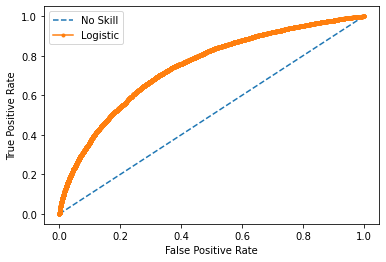

In [109]:
fpr, tpr, thresholds = roc_curve(data_y_test, proba_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [110]:
pd.DataFrame(proba_pred)

,0
0,0.309189
1,0.387118
2,0.458018
3,0.343183
4,0.552247
...,...
61498,0.154926
61499,0.338775
61500,0.190443
61501,0.079991


In [111]:
pd.DataFrame(data_y_test).reset_index(drop=True)

,TARGET
0,0
1,0
2,0
3,0
4,1
...,...
61498,0
61499,0
61500,0
61501,0


In [112]:
pred = pd.DataFrame(proba_pred)[0].apply(lambda x: 1 if x > 0.5 else 0)
pred

0        0
1        0
2        0
3        0
4        1
        ..
61498    0
61499    0
61500    0
61501    0
61502    1
Name: 0, Length: 61503, dtype: int64

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
#on compare les seuils
tresh_score = pd.DataFrame(columns=['threshold','fpr','fnr','score'])
threshold = np.arange(0.01,1.01,0.01)
for i in threshold:
    pred = pd.DataFrame(proba_pred)[0].apply(lambda x: 1 if x >= i else 0)
    tn, fp, fn, tp = confusion_matrix(data_y_test, pred).ravel()
    fpr = fp/confusion_matrix(data_y_test, pred).ravel().sum()
    fnr = fn/confusion_matrix(data_y_test, pred).ravel().sum()
    score = (10*fnr+fpr)#/10  
    row={'threshold':i,
     'fpr':fpr,
     'fnr':fnr,
     'score':score}
    tresh_score=tresh_score.append(row, ignore_index=True)
tresh_score.sort_values(by=['score'])

,threshold,fpr,fnr,score
51,0.52,0.247598,0.028747,0.535063
50,0.51,0.256979,0.027836,0.535340
52,0.53,0.237842,0.029787,0.535714
49,0.50,0.266670,0.026942,0.536088
48,0.49,0.276458,0.026064,0.537096
...,...,...,...,...
4,0.05,0.874120,0.000715,0.881274
3,0.04,0.887274,0.000488,0.892152
2,0.03,0.899403,0.000309,0.902493
1,0.02,0.909517,0.000195,0.911468


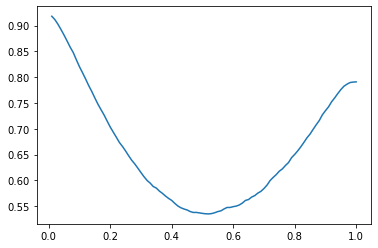

In [115]:
plt.plot(tresh_score['threshold'],tresh_score['score'])

In [116]:
pred = pd.DataFrame(proba_pred)[0].apply(lambda x: 1 if x >= 0.52 else 0)
confusion_matrix(data_y_test, pred)

array([[41411, 15228],
       [ 1768,  3096]], dtype=int64)

In [117]:
tn, fp, fn, tp = confusion_matrix(data_y_test, pred).ravel()
print('TP: ',tp,' FP: ',fp,'\nTN: ',tn,'FN: ',fn)

TP:  3096  FP:  15228 
TN:  41411 FN:  1768


## SHAP : Feature Importance

In [118]:
import shap

In [119]:
# load JS visualization code to notebook
shap.initjs()

In [120]:
data_x_train_kbest.columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       ...
       'client_installments_NUM_INSTALMENT_VERSION_mean_mean',
       'client_installments_NUM_INSTALMENT_VERSION_mean_max',
       'client_installments_NUM_INSTALMENT_VERSION_sum_mean',
       'client_installments_AMT_PAYMENT_min_min',
       'client_installments_AMT_PAYMENT_min_max',
       'client_installments_AMT_PAYMENT_mean_min',
       'client_installments_AMT_PAYMENT_mean_mean',
       'client_installments_AMT_PAYMENT_sum_min',
       'client_installments_AMT_PAYMENT_min_sum',
       'client_installments_AMT_INSTALMENT_min_sum'],
      dtype='object', length=200)

In [121]:
explainer = shap.Explainer(model, data_x_train_kbest, feature_names=data_x_train_kbest.columns)
shap_values = explainer(data_x_test_kbest)

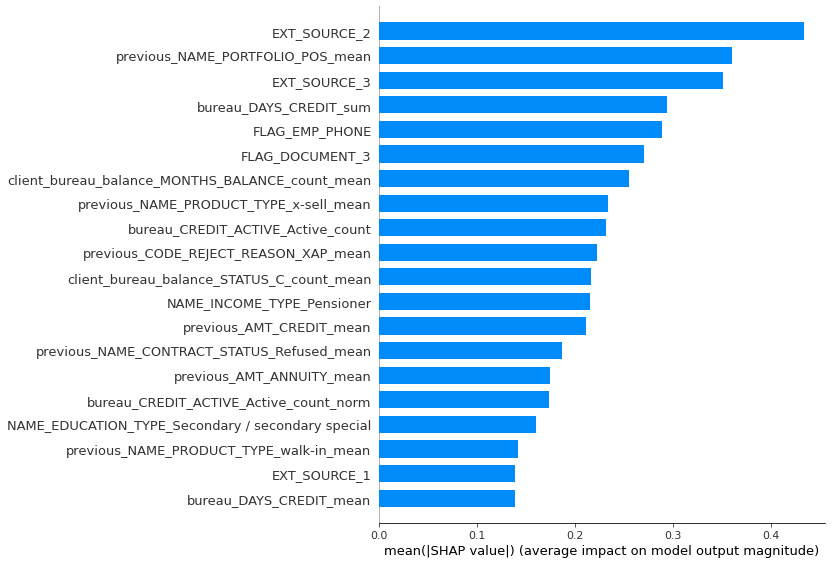

In [122]:
shap.summary_plot(shap_values, features=data_x_test_kbest, feature_names=data_x_train_kbest.columns, plot_type='bar')

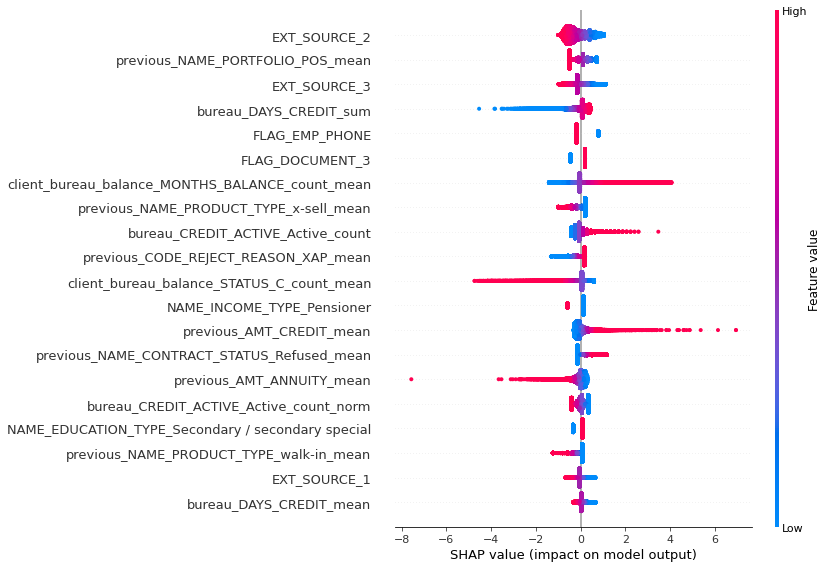

In [123]:
shap.summary_plot(shap_values)

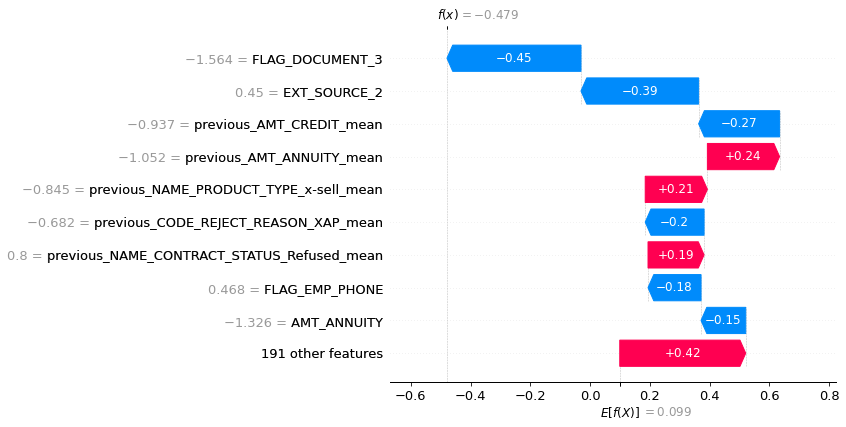

In [124]:
shap.plots.waterfall(shap_values[150])

## Enregistrement du modèle

In [53]:
import joblib
# save the model to disk
filename = 'modele.sav'
joblib.dump(model, filename)

['modele.sav']

Test :

In [54]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict_proba(pd.DataFrame(data_x_test_kbest.iloc[3]).T)
print(result)

[[0.65681696 0.34318304]]


## Enregistrement de l'explainer

In [ ]:
ex_filename = 'explainer.sav'
joblib.dump(explainer, filename=ex_filename)

Test :

In [ ]:
ex2 = joblib.load(filename=ex_filename)
shap_values2 = ex2(sample)
shap_values2

## Enregistrement des fichiers 

In [197]:
feats = ['SK_ID_CURR']
feats.extend(new_features)
len(feats)

201

In [199]:
clients=data_X[feats]
clients

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,client_installments_NUM_INSTALMENT_VERSION_mean_mean,client_installments_NUM_INSTALMENT_VERSION_mean_max,client_installments_NUM_INSTALMENT_VERSION_sum_mean,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_mean_min,client_installments_AMT_PAYMENT_mean_mean,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum
0,100002,0,0,406597.5,24700.5,0.018801,9461,-637.0,-3648.0,-2120,...,1.052632,1.052632,20.000000,9251.775,9251.775,11559.2470,11559.2470,219625.700,175783.73,175783.73
1,100003,0,0,1293502.5,35698.5,0.003541,16765,-1188.0,-1186.0,-291,...,1.040000,1.142857,9.440000,6662.970,98356.990,6731.1150,64754.5860,80773.380,1154108.20,1154108.20
2,100004,1,1,135000.0,6750.0,0.010032,19046,-225.0,-4260.0,-2531,...,1.333333,1.333333,4.000000,5357.250,5357.250,7096.1550,7096.1550,21288.465,16071.75,16071.75
3,100006,0,0,312682.5,29686.5,0.008019,19005,-3039.0,-9833.0,-2437,...,1.125000,2.000000,8.250000,2482.920,691786.900,5018.2646,62947.0860,25091.324,994476.70,994476.70
4,100007,0,0,513000.0,21865.5,0.028663,19932,-3038.0,-4311.0,-3458,...,1.166667,1.647059,16.439394,0.180,16046.100,1833.0391,12214.0600,18330.390,483756.38,825845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,254700.0,27558.0,0.032561,9327,-236.0,-8456.0,-1982,...,1.142857,1.142857,8.000000,6605.910,6605.910,7492.9243,7492.9243,52450.470,46241.37,46241.37
307507,456252,0,0,269550.0,12001.5,0.025164,20775,NaN,-4388.0,-4090,...,1.000000,1.000000,6.000000,10046.880,10046.880,10069.8670,10069.8670,60419.203,60281.28,60281.28
307508,456253,0,0,677664.0,29979.0,0.005002,14966,-7921.0,-6737.0,-5150,...,1.000000,1.000000,5.000000,27.270,5567.715,2772.6300,4115.9150,8317.890,41805.99,61529.04
307509,456254,0,0,370107.0,20205.0,0.005313,11961,-4786.0,-2562.0,-931,...,1.000000,1.000000,9.526316,2296.440,19065.824,2296.4400,10239.8320,22964.398,194556.81,194556.81


In [200]:
clients.to_csv('Data/clients.csv', index = False)

In [64]:
data_x_train_kbest.to_csv('Data/clients_train.csv', index = False)

### Création d'un échantillon pour les applications 
#### Echantillon sans prédiction pour l'API

In [ ]:
sample = clients.sample(n=6000)
sample

In [ ]:
sample.to_csv('Data/sample.csv')

In [ ]:
sample = pd.read_csv('Data/sample.csv')
sample.head()

#### Echantillon avec prédiction pour graphiques du Dashboard

In [ ]:
sample_pred = sample.copy()
sample_pred.insert(0, "PRED", model.predict(sample))

In [ ]:
sample_pred.to_csv('Data/sample_pred.csv')